In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('Breast_Cancer.csv')

In [16]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [33]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [35]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [43]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


<Axes: xlabel='Status', ylabel='count'>

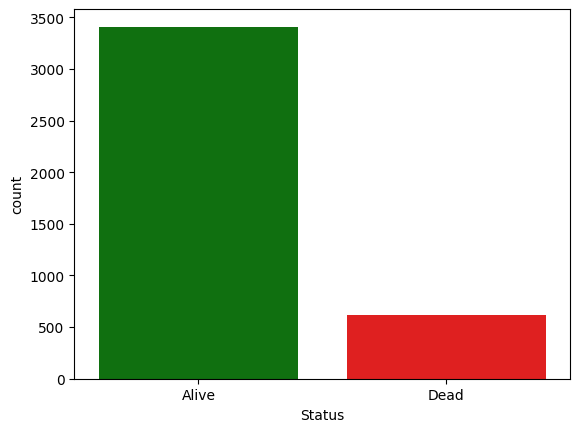

In [59]:
sns.countplot(x="Status", data=df , palette=(["g","r"]))

In [57]:
df.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [61]:
la = LabelEncoder()

In [117]:
text = df.select_dtypes(include="object")
int = df.select_dtypes(exclude="object")

In [119]:
for i in range(0,text.shape[1]):
    text.iloc[:,i]=la.fit_transform(text.iloc[:,i])

In [123]:
text = text.astype("int")

In [127]:
df = pd.concat([text,int],axis=1)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4024 non-null   int32
 1   Marital Status          4024 non-null   int32
 2   T Stage                 4024 non-null   int32
 3   N Stage                 4024 non-null   int32
 4   6th Stage               4024 non-null   int32
 5   differentiate           4024 non-null   int32
 6   Grade                   4024 non-null   int32
 7   A Stage                 4024 non-null   int32
 8   Estrogen Status         4024 non-null   int32
 9   Progesterone Status     4024 non-null   int32
 10  Status                  4024 non-null   int32
 11  Age                     4024 non-null   int64
 12  Tumor Size              4024 non-null   int64
 13  Regional Node Examined  4024 non-null   int64
 14  Reginol Node Positive   4024 non-null   int64
 15  Survival Months      

In [133]:
x = df.drop(['Status'], axis=1)
y = df.Status

In [171]:
rs = RandomOverSampler(random_state=41)
x_res , y_res =rs.fit_resample(x,y)

In [173]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.2 , random_state=21)

In [175]:
lg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
gb = GradientBoostingClassifier()

In [177]:
def pred(model):
    model.fit(x_train , y_train)
    pre = model.predict(x_test)
    print(classification_report(y_test , pre))

In [179]:
pred(lg)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       713
           1       0.79      0.77      0.78       651

    accuracy                           0.80      1364
   macro avg       0.80      0.80      0.80      1364
weighted avg       0.80      0.80      0.80      1364



In [181]:
pred(rf)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       713
           1       0.96      1.00      0.98       651

    accuracy                           0.98      1364
   macro avg       0.98      0.98      0.98      1364
weighted avg       0.98      0.98      0.98      1364



In [191]:
pred(svc)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       713
           1       0.81      0.70      0.75       651

    accuracy                           0.78      1364
   macro avg       0.78      0.77      0.77      1364
weighted avg       0.78      0.78      0.77      1364



In [183]:
pred(xgb)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       713
           1       0.91      0.99      0.95       651

    accuracy                           0.95      1364
   macro avg       0.95      0.95      0.95      1364
weighted avg       0.95      0.95      0.95      1364



In [185]:
pred(gb)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       713
           1       0.82      0.76      0.79       651

    accuracy                           0.81      1364
   macro avg       0.81      0.81      0.81      1364
weighted avg       0.81      0.81      0.81      1364

